In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
mnist = keras.datasets.fashion_mnist
(X_train, X_test), (y_train, y_test) = mnist.load_data()

In [3]:
y_train.shape

(10000, 28, 28)

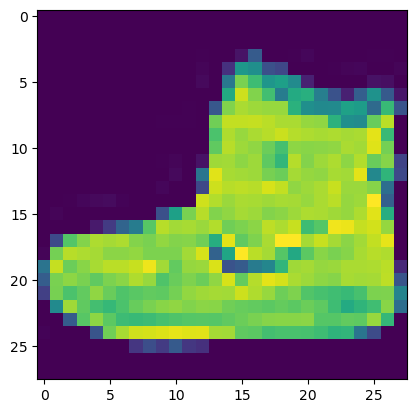

In [4]:
plt.imshow(X_train[0])
plt.grid(False)
plt.show()

In [5]:
X_train = X_train/255.0
y_train = y_train/255.0

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
len(X_test)

60000

In [9]:
X_test

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
y_train.shape

(10000, 28, 28)

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
             loss= keras.losses.sparse_categorical_crossentropy,
             metrics= ['accuracy'])

In [14]:
model.fit(X_train, X_test, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 5s 2ms/step - loss: 0.5043 - accuracy: 0.8232
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3797 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3172 - accuracy: 0.8828
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2987 - accuracy: 0.8899


In [15]:
loss,acc = model.evaluate(y_train, y_test, verbose=2)
print(loss)
print(acc)

313/313 - 1s - loss: 0.3488 - accuracy: 0.8761 - 586ms/epoch - 2ms/step
0.34877684712409973
0.8761000037193298


In [17]:
predictions = model.predict(y_train)
predictions

313/313 [==============================] - 0s 1ms/step


array([[1.08013337e-05, 2.49849677e-07, 6.89818691e-08, ...,
        9.33696851e-02, 4.50239342e-04, 8.99675727e-01],
       [2.05620643e-04, 2.38340370e-08, 9.64585364e-01, ...,
        4.19422275e-11, 4.73400092e-08, 2.56271697e-12],
       [9.51584752e-06, 9.99989986e-01, 1.31851188e-08, ...,
        1.47436381e-16, 4.51217119e-11, 5.00783822e-13],
       ...,
       [4.36887582e-04, 4.02774241e-08, 1.15122893e-05, ...,
        6.87969532e-07, 9.99199688e-01, 7.58392099e-11],
       [1.60376214e-06, 9.99922276e-01, 6.61960584e-08, ...,
        6.05609229e-10, 7.73015962e-09, 1.34267335e-08],
       [1.18333282e-05, 6.76857610e-08, 7.56826148e-06, ...,
        9.56473406e-03, 9.51391645e-04, 2.72947746e-05]], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

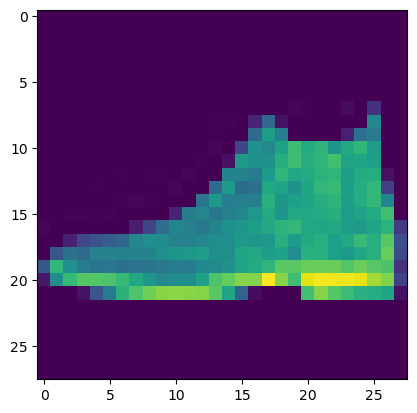

In [19]:
plt.imshow(y_train[0])
plt.grid(False)
plt.show()

In [26]:
class_names[np.argmax(predictions[0])]

'Ankle boot'